In [37]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram 
#%matplotlib inline

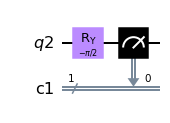

In [38]:
circ2 = QuantumCircuit(qr,cr)
circ2.ry(-np.pi/2,0)
circ2.measure(qr,cr)
circ2.draw('mpl')

In [39]:
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

ibmqfactory.load_account:WARNING:2023-02-18 00:31:25,424: Credentials are already in use. The existing account in the session will be replaced.


In [33]:
job_sim = execute(circ2,backend=BasicAer.get_backend('qasm_simulator'))
counts_sim = job_sim.result().get_counts()

qcomp = provider.get_backend('ibmq_quito')
job_qc = execute(circ2,backend=qcomp)

job_monitor(job_qc)

counts_qc = job_qc.result().get_counts()

Job Status: job has successfully run


In [34]:
counts_sim

{'0': 506, '1': 518}

In [35]:
counts_qc

{'0': 2126, '1': 1874}

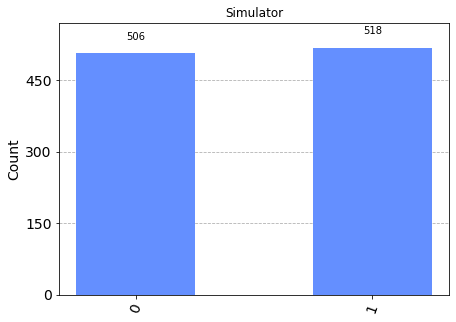

In [40]:
plot_histogram(counts_sim, title="Simulator")

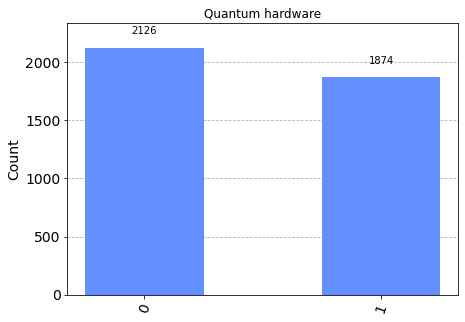

In [41]:
plot_histogram(counts_qc, title="Quantum hardware")